In [8]:
# Import all packages needed
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import json
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [9]:
# Import style.json
style_path: Path = Path.cwd().parent / 'style' / 'style.json'
with open(style_path, 'r') as f:
    style = json.load(f)

In [10]:
# Loading Data (data file must be in the same directory as jupyter notebook)
# Import data from excel file
# TODO: replace filename with the name of your data file
raw_data_filename: str ='JB-001-D-132_0_A12_5.txt'

# Tell program to read the data
raw_data: pd.DataFrame = pd.read_csv(raw_data_filename, sep=" ", header=None)

# Output data
raw_data

,0,1
0,399.8693,0
1,399.8762,1
2,399.8831,1
3,399.8901,2
4,399.8970,2
...,...,...
248827,3998.6880,0
248828,3998.7100,0
248829,3998.7321,0
248830,3998.7541,0


In [11]:
# Data preprocessing specific to MALDI
def preprocess(data: pd.DataFrame):
    """Function that applies transformation to the dataframe which will make it ready for plotting. Note, this is specific to UV-Vis.
    """

    # Rename column names
    data = data.rename(columns={data.columns[0]: "m/z", data.columns[1]: "Intensity (a.u.)"})

    return data

# NOTE: change True to False if you don't want normalization or baseline correction
preprocessed_data: pd.DataFrame = preprocess(raw_data)
preprocessed_data

,m/z,Intensity (a.u.)
0,399.8693,0
1,399.8762,1
2,399.8831,1
3,399.8901,2
4,399.8970,2
...,...,...
248827,3998.6880,0
248828,3998.7100,0
248829,3998.7321,0
248830,3998.7541,0


/var/folders/ff/8h_dksfn11xfp_fq0srryncc0000gn/T/ipykernel_25000/3264606456.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


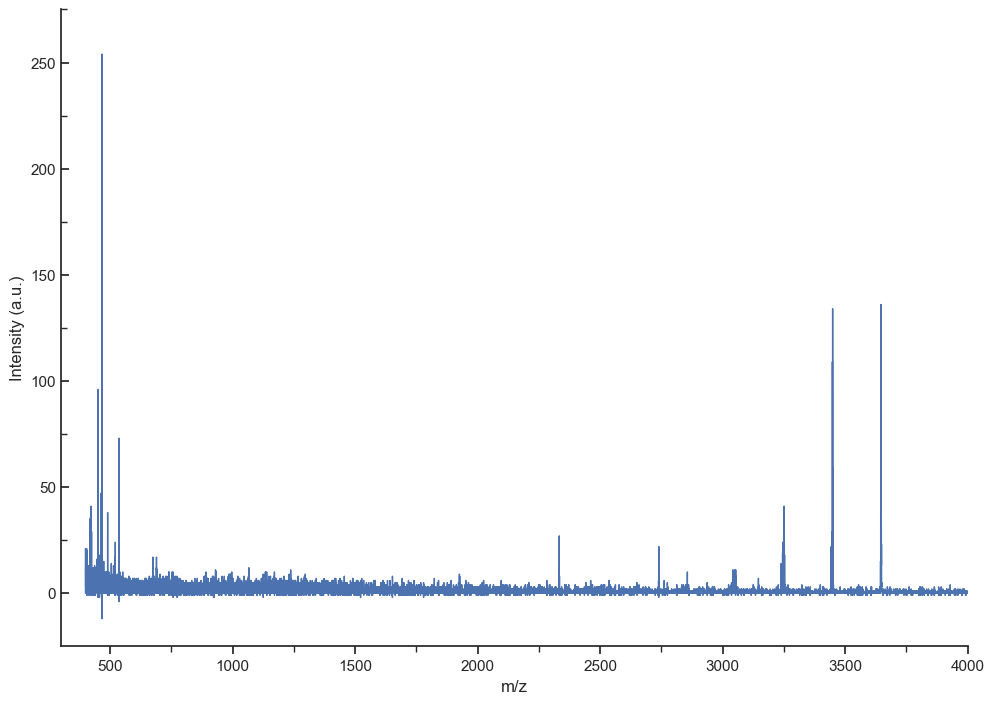

In [19]:
# Plot the data!
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)})
# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data,
    x="m/z",
    y="Intensity (a.u.)",
    palette="rocket_r",  #NOTE: User can change the palette here
    linewidth=style["graph"]["line_thickness"],
)
sns.despine()

graph.legend(
    fontsize=style["legend"]["font_size"],
    bbox_to_anchor=(0.7, 0.7),
    title_fontsize=18,
    shadow=False,
    frameon=False,
)
# font family
plt.rcParams['font.family'] = style["graph"]["font_family"]

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2))
graph.yaxis.set_minor_locator(AutoMinorLocator(2))
graph.tick_params(axis="y", direction="in")
graph.tick_params(axis="y", which="minor", length=4, direction="in")
graph.tick_params(axis="x", which="minor", length=4, direction="out")

# NOTE: User can change the x and y limits here
plt.xlim(300, 4000)
# NOTE: User can change the y limits here
plt.ylim(-25, 275)

plt.show()